In [7]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
from nltk.metrics import edit_distance
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_pairs = [
    ('logline-origin.txt', 'logline-final.txt'),
    ('character-origin.txt', 'character-final.txt'),
    ('plots-origin.txt', 'plots-final.txt'),
    ('dialogue-origin.txt', 'dialogue-final.txt'),
    ('scene-origin.txt', 'scene-final.txt')
]

In [9]:
# 函数：读取文件内容
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# 函数：计算Jaccard相似度
def calculate_jaccard_similarity(text1, text2):
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform([text1, text2])
    return jaccard_score(X.toarray()[0], X.toarray()[1])

# 函数：计算相对编辑距离
def calculate_relative_edit_distance(text1, text2):
    dist = edit_distance(text1, text2)
    max_len = max(len(text1), len(text2))
    return dist / max_len

# 存储结果
results = []



In [10]:
# 处理每个文件对
for origin, final in file_pairs:
    text1 = read_file(origin)
    text2 = read_file(final)
    
    jaccard_sim = calculate_jaccard_similarity(text1, text2)
    rel_edit_dist = calculate_relative_edit_distance(text1, text2)
    
    label = origin.split('-')[0]  # 提取类别标签
    results.append((jaccard_sim, rel_edit_dist, label))

    # 打印每个点的坐标
    print(f"File Pair: {origin} & {final}")
    print(f"Jaccard Similarity: {jaccard_sim}, Relative Edit Distance: {rel_edit_dist}\n")

File Pair: logline-origin.txt & logline-final.txt
Jaccard Similarity: 0.8, Relative Edit Distance: 0.05851063829787234

File Pair: character-origin.txt & character-final.txt
Jaccard Similarity: 0.8679245283018868, Relative Edit Distance: 0.078125

File Pair: plots-origin.txt & plots-final.txt
Jaccard Similarity: 0.38461538461538464, Relative Edit Distance: 0.5776699029126213

File Pair: dialogue-origin.txt & dialogue-final.txt
Jaccard Similarity: 0.23255813953488372, Relative Edit Distance: 0.7116941110801005

File Pair: scene-origin.txt & scene-final.txt
Jaccard Similarity: 0.7241379310344828, Relative Edit Distance: 0.1875



In [11]:
# 类别与颜色映射
category_color_map = {
    'logline': 'plum',
    'character': 'gold',
    'plots': 'wheat',
    'dialogue': 'lightsalmon',
    'scene': 'lightskyblue'
}

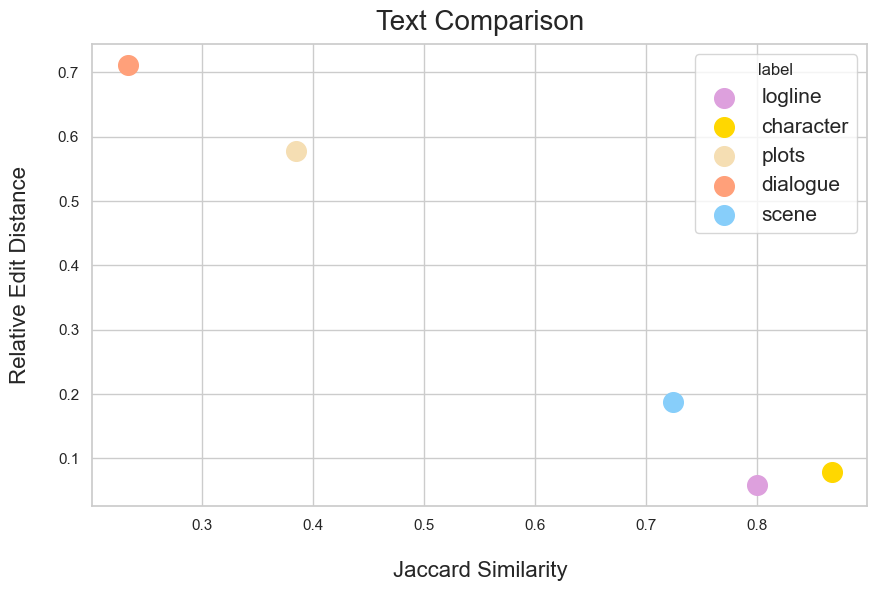

In [26]:
# 绘制图形
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

for jaccard_sim, rel_edit_dist, label in results:
    color = category_color_map.get(label, 'black')  # 默认颜色为黑色
    plt.scatter(jaccard_sim, rel_edit_dist, label=label, color=color, s=200)

plt.xlabel('Jaccard Similarity',fontsize=16,labelpad=20)
plt.ylabel('Relative Edit Distance',fontsize=16,labelpad=20)
plt.legend(title='label',fontsize=15)
plt.title('Text Comparison',fontsize=20,pad=10)
plt.show()